### Learnings
#### 1- Read and explore a textual dataset
#### 2- Build a machine learning model with TfidfVectorizer
#### 3- Create a confusion matrix and understand its components
#### 4- Evaluate the model’s accuracy

### Steps
#### 1- Import necessary libraries
#### 2- Read and explore the dataset
#### 3- Build a model using PassiveAggressiveClassifier
#### 4- Evaluate the model's accuracy

In [1]:
pip install numpy pandas sklearn


Note: you may need to restart the kernel to use updated packages.


#### 1- Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

#### 2- Read and explore the dataset

In [3]:
news_data= pd.read_csv(r"C:\Users\LPT-2170\Downloads\Python-Projects-Detecting-Fake-News\Data\news.csv")
news_data.head(10)

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   
5        6903                                        Tehran, USA   
6        7341  Girl Horrified At What She Watches Boyfriend D...   
7          95                  ‘Britain’s Schindler’ Dies at 106   
8        4869  Fact check: Trump and Clinton at the 'commande...   
9        2909  Iran reportedly makes new push for uranium con...   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  
5    \nI’m not an immigrant, but my grandparents ...  FAKE  
6  Share This Baylee Luciani (left), Screenshot o...  FAKE  
7  A Czech stockbroker who saved more than 650 Je...  REAL  
8  Hillary Clinton and Donald Trump made some ina...  REAL  
9  Iranian negotiators reportedly have made a las...  REAL

In [4]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [28]:
news_data.shape
# shape() function gives us the number of elements in each dimension of an array.

(6335, 4)

In [15]:
#value_counts() function returns object containing counts of unique values
news_data["label"].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [7]:
labels= news_data.label
labels.head(10)

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
5    FAKE
6    FAKE
7    REAL
8    REAL
9    REAL
Name: label, dtype: object

#### 3- Build the model

In [26]:
#First, we split the dataset into train & test samples:
#The train_test_split function of the sklearn. model_selection package in Python splits arrays or matrices into random subsets for train and test data, respectively.
#test_size is the number that defines the size of the test set.
#random_state as the name suggests, is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices in your case.
x_train, x_test, y_train, y_test= train_test_split(news_data["text"], labels, test_size= 0.4, random_state= 7)

In [25]:
#Then we’ll initialize TfidfVectorizer with English stop words
#The TfidfVectorizer uses an in-memory vocabulary (a python dict) to map the most frequent words to feature indices and hence compute a word occurrence frequency (sparse) matrix.
#Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence
#max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words". For example: max_df = 0.50 means "ignore terms that appear in more than 50% of the documents"
vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=vectorizer.fit_transform(x_train) 
#This method performs fit and transform on the input data at a single time and converts the data points. If we use fit and transform separate when we need both then it will decrease the efficiency of the model so we use fit_transform() which will do both the work.
tfidf_test=vectorizer.transform(x_test)

In [24]:
#Create a PassiveAggressiveClassifier
passive=PassiveAggressiveClassifier(max_iter=50)
#Passive: If the prediction is correct, keep the model and do not make any changes. i.e., the data in the example is not enough to cause any changes in the model. 
#Aggressive: If the prediction is incorrect, make changes to the model. i.e., some change to the model may correct it.
#max_iter : The maximum number of iterations the model makes over the training data.
#tol : The stopping criterion. If it is set to None, the model will stop when (loss > previous_loss  –  tol). By default, it is set to 1e-3.
passive.fit(tfidf_train,y_train)

y_pred=passive.predict(tfidf_test)
#Python predict() function enables us to predict the labels of the data values on the basis of the trained model. The predict() function accepts only a single argument which is usually the data to be tested.

#### 4- Evaluate the model's accuracy

In [23]:
#Create a confusion matrix
#A confusion matrix is a tabular summary of the number of correct and incorrect predictions made by a classifier. It can be used to evaluate the performance of a classification model through the calculation of performance metrics like accuracy, precision, recall, and F1-score.
matrix= confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
matrix

array([[1186,   84],
       [  86, 1178]], dtype=int64)

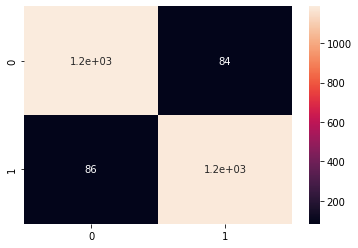

In [29]:
#Visualize the confusion matrix
#A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colours. The Seaborn package allows the creation of annotated heatmaps which can be tweaked using Matplotlib tools as per the creator's requirement
sns.heatmap(matrix, annot=True)
plt.show()

In [20]:
#Calculate the model's accuracy
#Accuracy Score = (TP+TN)/ (TP+FN+TN+FP)
Accuracy=accuracy_score(y_test,y_pred)
Accuracy*100

93.29123914759275

#### The model's accuracy is 93%

In [30]:
Report= classification_report(y_test, y_pred)
#It is a performance evaluation metric in machine learning which is used to show the precision, recall, F1 Score, and support score of your trained classification model.
print(Report)

              precision    recall  f1-score   support

        FAKE       0.93      0.93      0.93      1270
        REAL       0.93      0.93      0.93      1264

    accuracy                           0.93      2534
   macro avg       0.93      0.93      0.93      2534
weighted avg       0.93      0.93      0.93      2534

